### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**


### *Revisão*

Moacir A. Ponti - ICMC/USP

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

df = pd.read_csv("smartphone_activity_dataset.csv")
print(df.shape)
df.head(8)

(10299, 562)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,0.289,-0.0203,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,-0.935,...,-0.2990,-0.710,-0.1130,0.03040,-0.4650,-0.0184,-0.841,0.180,-0.0586,5
1,0.278,-0.0164,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,-0.943,...,-0.5950,-0.861,0.0535,-0.00743,-0.7330,0.7040,-0.845,0.180,-0.0543,5
2,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,-0.3910,-0.760,-0.1190,0.17800,0.1010,0.8090,-0.849,0.181,-0.0491,5
3,0.279,-0.0262,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,-0.939,...,-0.1170,-0.483,-0.0368,-0.01290,0.6400,-0.4850,-0.849,0.182,-0.0477,5
4,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,-0.3510,-0.699,0.1230,0.12300,0.6940,-0.6160,-0.848,0.185,-0.0439,5
5,0.277,-0.0101,-0.105,-0.997,-0.990,-0.995,-0.998,-0.990,-0.996,-0.942,...,-0.5450,-0.845,0.0826,-0.14300,0.2750,-0.3680,-0.850,0.185,-0.0421,5
6,0.279,-0.0196,-0.110,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,...,-0.2170,-0.564,-0.2130,-0.23100,0.0146,-0.1900,-0.852,0.182,-0.0430,5
7,0.277,-0.0305,-0.125,-0.997,-0.967,-0.982,-0.996,-0.966,-0.983,-0.941,...,-0.0823,-0.422,-0.0209,0.59400,-0.5620,0.4670,-0.851,0.184,-0.0420,5


## Problema: dados de sensores e atividades como alvo

<AxesSubplot:>

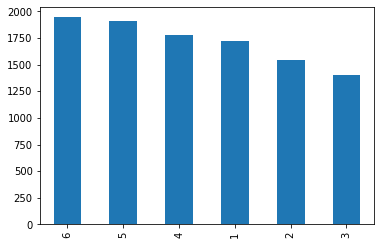

In [4]:
df['activity'].value_counts().plot(kind = 'bar')

In [5]:
df['activity'].value_counts()

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: activity, dtype: int64

### 1) Preparando dados e montando conjuntos de treinamento e teste



**converter o dataframe para numpy array e depois separar as features (entrada) dos alvos (saída)**

In [6]:
nparray = df.to_numpy()

In [7]:
nparray

array([[ 0.289 , -0.0203, -0.133 , ...,  0.18  , -0.0586,  5.    ],
       [ 0.278 , -0.0164, -0.124 , ...,  0.18  , -0.0543,  5.    ],
       [ 0.28  , -0.0195, -0.113 , ...,  0.181 , -0.0491,  5.    ],
       ...,
       [ 0.35  ,  0.0301, -0.116 , ...,  0.274 ,  0.181 ,  2.    ],
       [ 0.238 ,  0.0185, -0.0965, ...,  0.265 ,  0.188 ,  2.    ],
       [ 0.154 , -0.0184, -0.137 , ...,  0.264 ,  0.188 ,  2.    ]])

In [8]:
features = (nparray[:,:-1]).astype(float)
targets = (nparray[:,-1]).astype(int)
print("Features = ", features.shape)
print("Targets = ", targets.shape)

Features =  (10299, 561)
Targets =  (10299,)


In [9]:
# verificando as classes do problema
np.unique(targets)

array([1, 2, 3, 4, 5, 6])

In [10]:
print(np.unique(targets).shape[0])

6


**Split aleatório de 80% para treinamento**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

Exemplos de treinamento: 8239
Exemplos de teste: 2060


## 2) Projetando/montando a rede neural

In [31]:
def deep_net1(input_dim, output_dim=1, output_activation='relu', neurons=256, dropout_rate=0.0):
    # entrada
    input_data = keras.layers.Input(shape=(input_dim,))    
    
    # camadas intermediarias/ocultas
    x = keras.layers.Dense(neurons, activation='linear')(input_data)
    x = keras.layers.Dense(neurons, activation='relu')(x)
    x = keras.layers.Dense(neurons, activation='relu')(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    
    # saida
    output = keras.layers.Dense(output_dim, activation=output_activation)(x)
    
    # modelo
    dnn = keras.models.Model(input_data, output)
    return dnn

In [14]:
# instanciando rede
dnet = deep_net1(3,3)
dnet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 133,379
Trainable params: 133,379
Non-trainable params: 0
_____________________________________________________

In [15]:
# instanciando rede
dnet = deep_net1(3,1,'sigmoid')
dnet.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 132,865
Trainable params: 132,865
Non-trainable params: 0
_____________________________________________________

Vamos usar uma rede de **regressão** para predizer valores entre 1 e 6

In [16]:
dn1 = deep_net1(X_train.shape[1], 1, 'relu')
dn1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               143872    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 275,713
Trainable params: 275,713
Non-trainable params: 0
_____________________________________________________

## 3) Treinamento: configurar/compilar e ajustar parâmetros 

1. Compilação:
    * Otimizador
    * Taxa de aprendizado inicial
    * Decaimento da taxa de aprendizado
    * Função de custo/perda
    * Métricas de avaliação

In [17]:
dn1.compile(
    optimizer=keras.optimizers.Adam(), loss="mse", metrics=['accuracy', 'mae']
)

2. Treinamento (ajuste dos parâmetros iniciais):
    * Tamanho do minibatch
    * Número de épocas
    * Existência (opcional) de um conjunto de validação

In [18]:
batch_size = 16
epochs = 10

In [19]:
history1 = dn1.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   #validation_data=(X_val, y_val),
)

2022-01-13 21:27:10.893655: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-13 21:27:10.911652: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2595045000 Hz


Epoch 1/10


2022-01-13 21:27:13.433177: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 11/515 [..............................] - ETA: 8s - loss: 17.1818 - accuracy: 0.0000e+00 - mae: 3.7955 

2022-01-13 21:27:14.445920: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


515/515 [==============================] - 12s 16ms/step - loss: 3.3503 - accuracy: 0.1378 - mae: 1.0092
Epoch 2/10
515/515 [==============================] - 9s 18ms/step - loss: 0.1131 - accuracy: 0.1683 - mae: 0.2570 1s - loss: 0.1180 
Epoch 3/10
515/515 [==============================] - 11s 21ms/step - loss: 0.0792 - accuracy: 0.1683 - mae: 0.2098
Epoch 4/10
515/515 [==============================] - 8s 15ms/step - loss: 0.0778 - accuracy: 0.1683 - mae: 0.2036
Epoch 5/10
515/515 [==============================] - 9s 17ms/step - loss: 0.0588 - accuracy: 0.1683 - mae: 0.1723
Epoch 6/10
515/515 [==============================] - 7s 14ms/step - loss: 0.0564 - accuracy: 0.1683 - mae: 0.1692
Epoch 7/10
515/515 [==============================] - 6s 12ms/step - loss: 0.0501 - accuracy: 0.1683 - mae: 0.1564
Epoch 8/10
515/515 [==============================] - 9s 18ms/step - loss: 0.0470 - accuracy: 0.1683 - mae: 0.1484
Epoch 9/10
515/515 [==============================] - 8s 15ms/step - l

O que está dando errado?

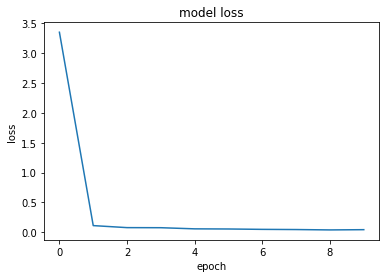

In [20]:
plt.plot(history1.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()


In [21]:
# Computando as métricas para o teste
score = dn1.evaluate(X_test, y_test, verbose=0)

In [22]:
print("MSE (Custo): ", score[0])
print("Accuracy: ", score[1])
print("MAE: ", score[2])

MSE (Custo):  0.03355376794934273
Accuracy:  0.1626213639974594
MAE:  0.10887958109378815


In [23]:
y_pred = dn1.predict(X_test[:5])

print('real - predito')
for i in range(5):
    print(y_test[i], end=' - ')
    print(y_pred[i])

real - predito
4 - [4.0547013]
3 - [2.91022]
6 - [6.072311]
2 - [2.0271597]
1 - [1.0158725]


## 3) Alterando para uma rede de classificação

1. A última camada deve ter um neurônio para cada classe (saída do tipo one-hot-encoding)
2. A ativação deve ser softmax
3. Também precisamos alterar a função de custo

In [24]:
# preparando o vetor y
y_train[:3]

array([3, 4, 1])

In [25]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [26]:
num_classes = np.unique(y_train).shape[0]
print(num_classes)

6


Precisamos criar vetores do tipo one-hot

Para isso podemos utilizar `to_categorical` mas esse requer entrada com valores iniciando em 0 (zero)

In [28]:
y_train = keras.utils.to_categorical(y_train-1, num_classes)
y_test = keras.utils.to_categorical(y_test-1, num_classes)

In [29]:
# vetor y resultante
y_train[:3]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
dclass = deep_net1(X_train.shape[1], 6, 'softmax')
dclass.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               143872    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 1542      
Total params: 276,998
Trainable params: 276,998
Non-trainable params: 0
_____________________________________________________

In [33]:
dclass.compile(
    optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=['accuracy', 'mse']
)

In [34]:
epochs = 15

history2 = dclass.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   #validation_data=(X_test, y_test),
)

Epoch 1/15
515/515 [==============================] - 12s 18ms/step - loss: 0.3246 - accuracy: 0.8635 - mse: 0.0318
Epoch 2/15
515/515 [==============================] - 8s 16ms/step - loss: 0.1669 - accuracy: 0.9318 - mse: 0.0163
Epoch 3/15
515/515 [==============================] - 7s 13ms/step - loss: 0.1464 - accuracy: 0.9422 - mse: 0.0142
Epoch 4/15
515/515 [==============================] - 8s 16ms/step - loss: 0.1156 - accuracy: 0.9524 - mse: 0.0113
Epoch 5/15
515/515 [==============================] - 8s 15ms/step - loss: 0.1150 - accuracy: 0.9544 - mse: 0.0110
Epoch 6/15
515/515 [==============================] - 8s 16ms/step - loss: 0.0914 - accuracy: 0.9659 - mse: 0.0087 3s - loss: 0.0948 - accuracy: 0. - ETA: 1s - loss: 0.0902 
Epoch 7/15
515/515 [==============================] - 7s 14ms/step - loss: 0.1077 - accuracy: 0.9599 - mse: 0.0099
Epoch 8/15
515/515 [==============================] - 7s 14ms/step - loss: 0.0907 - accuracy: 0.9641 - mse: 0.0086
Epoch 9/15
515/515 [

In [39]:
# obtem a predicao e arredonda para 2 casas
y_pred = np.round(dclass.predict(X_test[:5]), 2)

print('real - predito')
for i in range(5):
    print(y_test[i], end=' - ')
    print(y_pred[i])

real - predito
[0. 0. 0. 1. 0. 0.] - [0.   0.   0.   0.64 0.36 0.  ]
[0. 0. 1. 0. 0. 0.] - [0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.] - [0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.] - [0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.] - [1. 0. 0. 0. 0. 0.]


## 4) Pequenas melhorias

* Inserir dropout
* Decaimento de learning rate

In [56]:
dclass2 = deep_net1(X_train.shape[1], 6, 'softmax', dropout_rate=0.2)

def scheduler(epoch, lr):
    # epoch - época atual
    # lr - learning rate atual
    
    # roda por 2 epocas com o LR inicial
    if epoch < 3:
        return lr
    else:
        # decai exponencialmente com fator -0.1
        lr = lr * tf.math.exp(-0.1)
        print(lr)
        return lr

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)

dclass2.compile(
    optimizer=keras.optimizers.Adam(0.0025), loss="categorical_crossentropy", metrics=['accuracy']
)

In [57]:
epochs = 15

history3 = dclass2.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   callbacks=[callbacklr])


Epoch 1/15
515/515 [==============================] - 2s 2ms/step - loss: 0.4195 - accuracy: 0.8258
Epoch 2/15
515/515 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.9058
Epoch 3/15
515/515 [==============================] - 1s 2ms/step - loss: 0.2095 - accuracy: 0.9246
Epoch 4/15
tf.Tensor(0.0022620934, shape=(), dtype=float32)
515/515 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9504
Epoch 5/15
tf.Tensor(0.0020468265, shape=(), dtype=float32)
515/515 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9556
Epoch 6/15
tf.Tensor(0.0018520452, shape=(), dtype=float32)
515/515 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9629
Epoch 7/15
tf.Tensor(0.0016757997, shape=(), dtype=float32)
515/515 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9641
Epoch 8/15
tf.Tensor(0.0015163262, shape=(), dtype=float32)
515/515 [==============================] - 1

In [59]:
# obtem a predicao e arredonda para 2 casas
y_pred = np.round(dclass2.predict(X_test[:5]), 1)

print('real - predito')
for i in range(5):
    print(y_test[i], end=' - ')
    print(y_pred[i])

real - predito
[0. 0. 0. 1. 0. 0.] - [0.  0.  0.  0.9 0.1 0. ]
[0. 0. 1. 0. 0. 0.] - [0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.] - [0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.] - [0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.] - [1. 0. 0. 0. 0. 0.]
